# 1. Data Preprocessing

## Data load

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train_df = pd.read_csv('./traindata.csv')
train_df.head(3)

,id,age,sex,bmi,children,smoker,region,charges
0,0,26,male,32.665465,3,no,southeast,0
1,1,41,male,29.798725,1,no,southwest,0
2,2,28,male,32.722029,0,yes,northwest,1


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1600 non-null   int64  
 1   age       1600 non-null   int64  
 2   sex       1600 non-null   object 
 3   bmi       1600 non-null   float64
 4   children  1600 non-null   int64  
 5   smoker    1600 non-null   object 
 6   region    1600 non-null   object 
 7   charges   1600 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 100.1+ KB


## EDA

In [9]:
print(train_df['sex'].value_counts())
print(train_df['region'].value_counts())
print(train_df['smoker'].value_counts())

sex
male      841
female    759
Name: count, dtype: int64
region
northeast    414
southeast    408
northwest    403
southwest    375
Name: count, dtype: int64
smoker
no     1261
yes     339
Name: count, dtype: int64


<Axes: xlabel='sex', ylabel='charges'>

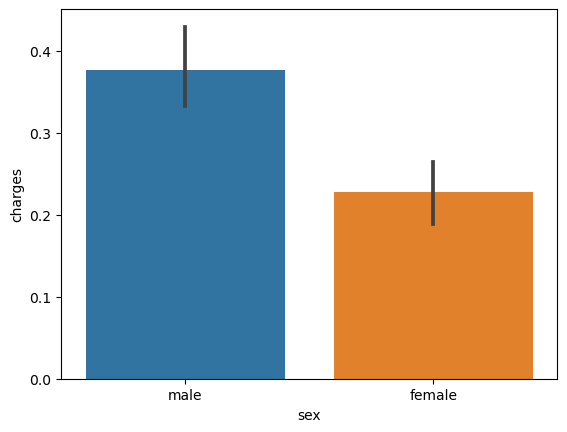

In [10]:
sns.barplot(x='sex', y = 'charges', data=train_df)

<Axes: xlabel='region', ylabel='charges'>

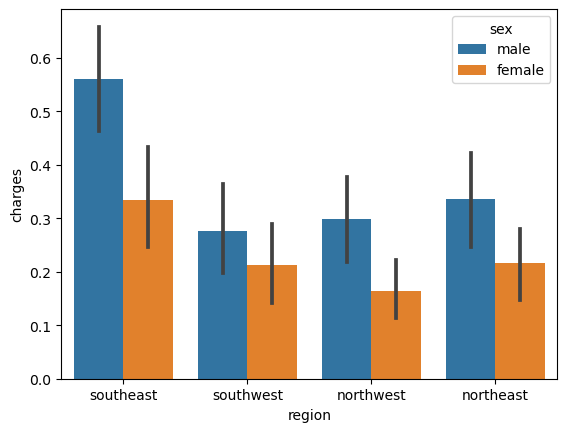

In [11]:
sns.barplot(x='region', y='charges', hue='sex', data=train_df) #hue: 범례

<Axes: xlabel='smoker', ylabel='charges'>

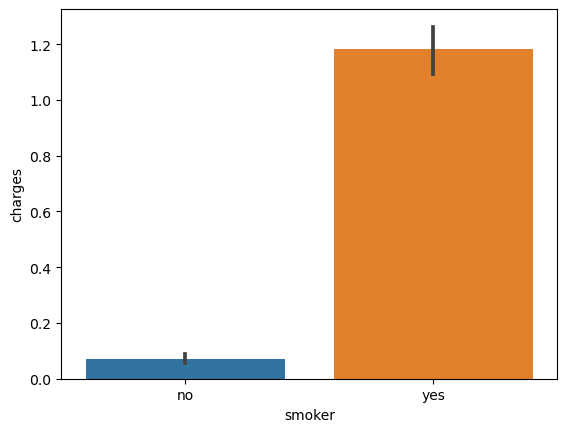

In [12]:
sns.barplot(x='smoker', y = 'charges', data=train_df)

<Axes: xlabel='children', ylabel='charges'>

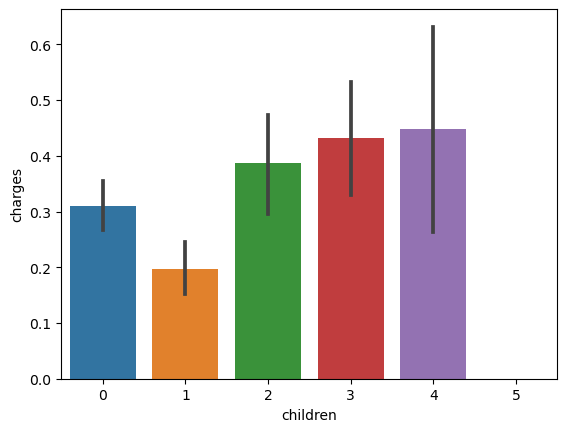

In [13]:
sns.barplot(x='children', y = 'charges', data=train_df)

### AS a result of EDA 'region' and 'children' seems to have no serious influence on charges->delete

In [15]:
train_copy = train_df.copy()
train_copy = train_copy.drop(['id', 'region', 'children'], axis = 1)
train_copy.head(3)

,age,sex,bmi,smoker,charges
0,26,male,32.665465,no,0
1,41,male,29.798725,no,0
2,28,male,32.722029,yes,1


## Encoding(sex, smoker)

### One-hot encoding

In [18]:
def encode_features(dataDF):
    features = ['sex', 'smoker']
    dataDF = pd.get_dummies(dataDF, columns=features)
    return dataDF

train_en = encode_features(train_copy)
train_en.head()

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes
0,26,32.665465,0,False,True,True,False
1,41,29.798725,0,False,True,True,False
2,28,32.722029,1,False,True,False,True
3,20,38.429831,0,True,False,True,False
4,45,29.641854,0,True,False,True,False


## Make Preprocess into one fuction

### Function with one-hot encode

In [21]:
def drop_column(df):
    df = df.drop(['id','region', 'children'], axis=1)
                 
    return df
    
def one_hot(df):
    features = ['sex', 'smoker']
    df = pd.get_dummies(df, columns=features)
    return df
        
def prepro_one(df):
    df = drop_column(df)
    df = one_hot(df)
    return df

one_df = prepro_one(train_df)
one_df.head(3)

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes
0,26,32.665465,0,False,True,True,False
1,41,29.798725,0,False,True,True,False
2,28,32.722029,1,False,True,False,True


# 2. Modeling

### (1). Upload train data again and divide into two sets(x[variables], y[label])

In [24]:
train_df = pd.read_csv('./traindata.csv')
y_train_df = train_df['charges']
X_train_df= train_df.drop('charges',axis=1)

train_one = prepro_one(X_train_df)
train_one.head(3)

,age,bmi,sex_female,sex_male,smoker_no,smoker_yes
0,26,32.665465,False,True,True,False
1,41,29.798725,False,True,True,False
2,28,32.722029,False,True,False,True


In [25]:
y_train_df.head(3)

0    0
1    0
2    1
Name: charges, dtype: int64

## (2). Split data into 7:3

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(train_one, y_train_df, \
                                                  test_size=0.3, random_state=11)

## (3). Testing several models

### DecisionTree

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt_clf = DecisionTreeClassifier(random_state=11) # 빈 객체 생성
dt_clf.fit(X_train , y_train) # 학습
dt_pred = dt_clf.predict(X_test) # 예측
print(accuracy_score(y_test, dt_pred)) # 정확도 평가

0.8541666666666666


### RandomForest

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=11) # 빈 객체 생성
rf_clf.fit(X_train , y_train) # 학습
rf_pred = rf_clf.predict(X_test) # 예측
print(accuracy_score(y_test, rf_pred)) # 정확도

0.8645833333333334


### LogisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(solver='liblinear') # 객체 생성, liblinear가 항상 좋다고는 보장 못 함. 여러가지 시도해봐야지
lr_clf.fit(X_train , y_train) # 학습
lr_pred = lr_clf.predict(X_test) # 예측
print(accuracy_score(y_test, lr_pred))

0.8729166666666667


### This doesn't mean RandomForest is the best -> Further check is needed

## (4). Cross check

### DecisionTree

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_clf, X_train, y_train, cv = 5)
print(scores)
print("Mean: {0:.4f}".format(scores.mean()))

[0.82142857 0.82589286 0.81696429 0.80803571 0.82589286]
Mean: 0.8196


### RandomForest

In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_clf, X_train, y_train, cv = 5)
print(scores)

print("Mean: {0:.4f}".format(scores.mean()))

[0.84821429 0.84375    0.84821429 0.86160714 0.85714286]
Mean: 0.8518


### LogisticRegression

In [55]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_clf, X_train, y_train, cv = 5)
print(scores)

print("Mean: {0:.4f}".format(scores.mean()))

[0.86607143 0.86160714 0.87053571 0.86160714 0.87946429]
Mean: 0.8679


## (5). Finding opimal hyperparameter with GridSearchCV(여기선 했음)

### RF

In [66]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# 경고 메시지 무시 설정
warnings.filterwarnings('ignore')

# 하이퍼파라미터 그리드 설정
parameters = {
    'n_estimators': [50, 100, 200],  # 트리의 개수
    'max_depth': [None, 10, 20, 30],  # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],  # 내부 노드를 분할하는 데 필요한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],  # 리프 노드에 필요한 최소 샘플 수
    'max_features': ['sqrt', 'log2']  # 각 트리에서 사용할 최대 특성 개수
}

grid_rf = GridSearchCV(rf_clf, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1) # GridSearchCV 객체 생성
grid_rf.fit(X_train, y_train)# 학습

# 최적 하이퍼파라미터 및 최고 정확도 출력
print('GridSearchCV 최적 하이퍼 파라미터 :', grid_rf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_rf.best_score_))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
GridSearchCV 최고 정확도: 0.8732


In [76]:
# 최적의 모델로 예측 및 평가
best_rf = grid_rf.best_estimator_
rf_predictions = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, rf_predictions)
print(f"테스트 세트 정확도: {accuracy:.4f}")

테스트 세트 정확도: 0.8750


In [78]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_rf, X_train, y_train, cv = 5)
print(scores)
print("Mean: {0:.4f}".format(scores.mean()))

[0.87946429 0.85714286 0.86160714 0.87053571 0.89732143]
Mean: 0.8732


### LR

In [72]:
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np
warnings.filterwarnings('ignore')

parameters = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear']
}

grid_lr = GridSearchCV(lr_clf, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1) # GridSearchCV 객체 생성
grid_lr.fit(X_train, y_train) # 학습

# 최적 하이퍼파라미터 및 최고 정확도 출력
print('GridSearchCV 최적 하이퍼 파라미터 :', grid_lr.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_lr.best_score_))

GridSearchCV 최적 하이퍼 파라미터 : {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
GridSearchCV 최고 정확도: 0.8679


In [80]:
# 최적의 모델로 예측 및 평가
best_lr = grid_lr.best_estimator_
lr_predictions = best_lr.predict(X_test)
accuracy = accuracy_score(y_test, lr_predictions)
print(f"테스트 세트 정확도: {accuracy:.4f}")

테스트 세트 정확도: 0.8729


In [82]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_lr, X_train, y_train, cv = 5)
print(scores)
print("Mean: {0:.4f}".format(scores.mean()))

[0.86607143 0.86160714 0.87053571 0.86160714 0.87946429]
Mean: 0.8679


## (6). Predict with test data

In [88]:
sample_df = pd.read_csv('./sample_submit.csv', header = None)
sample_df.head(5)

,0,1
0,13,0
1,23,0
2,27,0
3,28,0
4,29,0


In [90]:
sample_df[0]

0        13
1        23
2        27
3        28
4        29
       ... 
395    1968
396    1972
397    1979
398    1983
399    1995
Name: 0, Length: 400, dtype: int64

In [92]:
test_df = pd.read_csv('./testdata.csv')
test_one = prepro_one(test_df)
test_one.head(3)

,age,bmi,sex_female,sex_male,smoker_no,smoker_yes
0,19,24.365178,False,True,True,False
1,59,33.997763,False,True,False,True
2,42,29.283450,True,False,True,False


### Prediction with best RandomForest(best_rf)

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

pred_rf = best_rf.predict(test_one) # 예측
pre_bestrf = pd.DataFrame(data=pred_rf, columns=[1])
pre_bestrf.head(5)

,1
0,0
1,2
2,0
3,0
4,0


In [101]:
pre_bestrf[0] = sample_df[0]
pre_bestrf.head(5)

,1,0
0,0,13
1,2,23
2,0,27
3,0,28
4,0,29


In [105]:
pre_bestrf = pre_bestrf[[0, 1]]
pre_bestrf.head(5)

,0,1
0,13,0
1,23,2
2,27,0
3,28,0
4,29,0


In [107]:
pre_bestrf.to_csv('onehot(best_rf).csv', index=False, header = False)

### Prediction with best LogisticRegression(best_lr)

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

pred_lr = best_lr.predict(test_one) # 예측
pre_bestlr = pd.DataFrame(data=pred_lr, columns=[1])
pre_bestlr.head(5)

,1
0,0
1,2
2,0
3,0
4,0


In [112]:
pre_bestlr[0] = sample_df[0]
pre_bestlr.head(5)

,1,0
0,0,13
1,2,23
2,0,27
3,0,28
4,0,29


In [114]:
pre_bestlr = pre_bestlr[[0, 1]]
pre_bestlr.head(5)

,0,1
0,13,0
1,23,2
2,27,0
3,28,0
4,29,0


In [116]:
pre_bestlr.to_csv('onehot(best_lr).csv', index=False, header = False)